# Ejercicios de clase - Potencia
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

## Problema N°4
Si se conoce que, para una tensión alterna de U=380 V, la potencia activa total es P=400 W y que la potencia inductiva total es Q=870 VAr.
1. Hallar el valor de la potencia reactiva de capacitores necesarios a conectar en paralelo, para lograr un factor de potencia, visto de la fuente, sea igual a 0,86 inductivo.
2. Representar los triángulos de potencia, antes y después de la compensación.
3. Determinar el valor de la capacitancia a incorporar, si la frecuencia de red es 50 Hz.

### Solución
__Datos:__
$\left\{
\begin{array}{l}
U = 380 \, \mathrm{V} \\
P = 400 \, \mathrm{W} \\
Q = 870 \, \mathrm{VAr}
\end{array}
\right.$

1) ítem

__Cálculo de $\varphi_1$__
$$ \tan \varphi_1 = \frac{Q_1}{P} \qquad \rightarrow \qquad \varphi_1 =  \arctan \mathrm{ \frac{870 \, VAr}{400 \, W} = 65,31^\circ } $$

__Cálculo $I_1$__
$$ P_1 = U I_1 \cos( \varphi_1 ) $$

$$ I_1 = \frac{P_1}{U \cos( \varphi_1 )} = 2,52 \, \mathrm{A} $$

__Cálculo de $I_2$__
$$ P_1 = P_2 \quad \rightarrow \quad U I_1 \cos (\varphi_1) = U I_2 \cos( \varphi_2 ) $$

$$ I_2 = I_1 {\cos \varphi_1 \over \cos \varphi_2  } = I_1 { \cos \varphi_1  \over 0,86 } = 1,22 \, \mathrm{A} $$

__Cálculo de $\varphi_2$__
$$ \varphi_2 = \arccos 0,86 = 30,68^\circ $$

__Cálculo de $Q_2$__
$$ Q_2 = U I_2 \sin \varphi_2 = 237,35 \, \mathrm{VAr} $$

__Cálculo de $Q_C$__
$$ Q_C = Q_1 - Q_2 = 632,65 \, \mathrm{VAr} $$

2) ítem

__Cálculo de $S_1$__

$$ S_1 = \sqrt{P_1^2 + Q_1^2} = 957,55 \, \mathrm{VA} $$

__Cálculo de $S_2$__

$P_1 = P_2$
$$ S_2 = \sqrt{P^2_2 + Q^2_2} = 465,12 \, \mathrm{VA}$$

3) ítem

__Cálculo de $Q_C$__
$$ Q_C = \frac{U^2}{X_C} = \frac{U^2}{ 1 \over \omega C } $$

Entonces
$$ C = \frac{Q_C}{2 \pi f U^2} = 13,9 \, \mu \mathrm{F} $$

In [27]:
# Datos:
U = 380 # V
P1 = 400 # W
Q1 = 870 # VAr
fp = 0.86 # factor de potencia
f = 50 # Hz

In [28]:
import math, cmath

In [30]:
## ítem 1
# Cálculo de phi
phi1 = math.atan(Q1/P1)
# Cálculo de I1
I1 = P1/(U*math.cos( phi1 ) )
# Cálculo de I2
I2 = I1 * math.cos(phi1)/fp
# Cálculo de phi2
phi2 = math.acos(fp)
# Cálculo de Q2
Q2 = U*I2*math.sin(phi2)
# Cálculo de Qc
Qc = Q1 - Q2

In [31]:
## ítem 2
# Cálculo de S1
S1 = math.sqrt(P1**2 + Q1**2)
# Cálculo de S2
P2 = P1
S2 = math.sqrt(P2**2 + Q2**2)

In [32]:
## ítem 3
C = Qc/(2*math.pi*f*U**2)

In [33]:
print('Resultados:')
print('I1 = %.2f A'%I1)
print('I2 = %.2f A'%I2)

print('ítem 1')
print('Qc = %.2f VAr'%Qc)
print('ítem 2')
print('S1 = %.2f VA'%S1)
print('S2 = %.2f VA'%S2)
print('ítem 3')
print('C = %.2f uF'%(C*1e6) )

Resultados:
I1 = 2.52 A
I2 = 1.22 A
ítem 1
Qc = 632.65 VAr
ítem 2
S1 = 957.55 VA
S2 = 465.12 VA
ítem 3
C = 13.95 uF


In [34]:
import numpy as np
import matplotlib.pyplot as plt

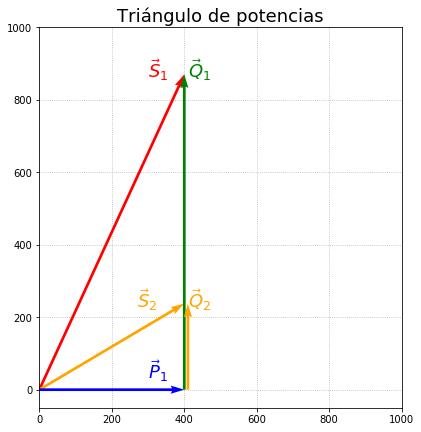

In [36]:
%matplotlib inline
plt.figure(figsize=(7,7))
ax = plt.gca()
ax.quiver(0,0,P1,Q1,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,P2,Q2,angles='xy',scale_units='xy',scale=1,color='orange')
ax.quiver(0,0,P1,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(P1,0,0,Q1,angles='xy',scale_units='xy',scale=1,color='green')
ax.quiver(P2 + 10,0,0,Q2,angles='xy',scale_units='xy',scale=1,color='orange')  
plt.text(P1 - 100, Q1 - 10 , r'$\vec S_1$', fontsize=18, color='red', fontweight='bold')
plt.text(P2 - 130, Q2 - 10 , r'$\vec S_2$', fontsize=18, color='orange', fontweight='bold')
plt.text(P1 - 100,  30, r'$\vec P_1$', fontsize=18, color='blue', fontweight='bold')
plt.text(P1 + 10, Q1 - 10, r'$\vec Q_1$', fontsize=18, color='green', fontweight='bold')
plt.text(P2 + 10, Q2 - 10, r'$\vec Q_2$', fontsize=18, color='orange', fontweight='bold')
ax.set_xlim([0,1000])
ax.set_ylim([-50,1000])
ax.set_aspect('equal')
plt.title('Triángulo de potencias', fontsize=18)
plt.xlabel('Re (Eje real)',  fontsize=16)
plt.ylabel('Im (Eje imaginario)',  fontsize=16)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

In [ ]:
%reset -s -f